In [5]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd

cfp_outdir = '/home/martin/projects/retinal_image_deid/data/processed_cfp'
seg_outdir = '/home/martin/projects/retinal_image_deid/data/processed_seg'

im_size = (512, 512)

# CHASEDB1 Image preprocessing

In [2]:
# CHASEDB1
path = '/home/martin/projects/SPADE/datasets/CHASEDB1'

file_mapping = []

for image in os.listdir(path):
    
    # Only taking vessel segmentation by one of two annotators
    if '2ndHO' in image:
        continue
    
    image_path = os.path.join(path, image)
    im = Image.open(image_path)
    
    out_file = image.split('.')[0] + '_resized.jpg'
    
    if 'HO' in image:
        out_dir = seg_outdir
        out_file = image.split('1stHO')[0] + 'resized.png'
        im_type = 'seg'
    else:
        out_dir = cfp_outdir
        out_file = image.split('.')[0] + '_resized.jpg'
        im_type = 'cfp'

    img = im.resize(im_size, Image.ANTIALIAS)
    img.save(os.path.join(out_dir, out_file))
    file_mapping.append([os.path.join(path, image), os.path.join(out_dir, out_file),  im_type])


# DRIVE image preprocesssing

In [3]:
cfp_path = '/home/martin/projects/SPADE/datasets/DRIVE/training/images'
seg_path = '/home/martin/projects/SPADE/datasets/DRIVE/training/1st_manual'

for image in os.listdir(cfp_path):
    image_path = os.path.join(cfp_path, image)
    im = Image.open(image_path)
    
    out_file = image.split('.')[0] + '_resized.jpg'
    img = im.resize(im_size, Image.ANTIALIAS)
    img.save(os.path.join( cfp_outdir, out_file))
    file_mapping.append([os.path.join(cfp_path, image), os.path.join(cfp_outdir, out_file),  'cfp'])

for image in os.listdir(seg_path):
    image_path = os.path.join(seg_path, image)
    im = Image.open(image_path)
    out_file = image.split('_')[0] + '_training_resized.png'
    img = im.resize(im_size, Image.ANTIALIAS)
    img.save(os.path.join(seg_outdir, out_file))
    file_mapping.append([os.path.join(seg_path, image), os.path.join(seg_outdir, out_file),  'seg'])


# STARE image preprocesssing

In [4]:
cfp_path = '/home/martin/projects/SPADE/datasets/STARE/stare-images'
seg_path = '/home/martin/projects/SPADE/datasets/STARE/labels-vk'

for image in os.listdir(cfp_path):
    image_path = os.path.join(cfp_path, image)
    im = Image.open(image_path)
    
    out_file = image.split('.')[0] + '_resized.jpg'
    out_dir = cfp_outdir
    
    img = im.resize(im_size, Image.ANTIALIAS)
    img.save(os.path.join(out_dir, out_file))
    file_mapping.append([os.path.join(cfp_path, image), os.path.join(out_dir, out_file),  'cfp'])
    
    seg_image_path = os.path.join(seg_path, image.split('.')[0]+'.vk.ppm')
    seg_im = Image.open(seg_image_path)
    out_file = image.split('.')[0]+'_resized.png'
    seg_img = seg_im.resize(im_size, Image.ANTIALIAS)
    seg_img.save(os.path.join(seg_outdir, out_file))
    file_mapping.append([seg_image_path, os.path.join(seg_outdir, out_file),  'seg'])

    

# Create dataframe to map originals to resized images/seg

In [7]:
df = pd.DataFrame(file_mapping, columns=['original', 'resized', 'image_type'])
df.head()

original  \
0  /home/martin/projects/SPADE/datasets/CHASEDB1/...   
1  /home/martin/projects/SPADE/datasets/CHASEDB1/...   
2  /home/martin/projects/SPADE/datasets/CHASEDB1/...   
3  /home/martin/projects/SPADE/datasets/CHASEDB1/...   
4  /home/martin/projects/SPADE/datasets/CHASEDB1/...   

                                             resized image_type  
0  /home/martin/projects/retinal_image_deid/data/...        cfp  
1  /home/martin/projects/retinal_image_deid/data/...        cfp  
2  /home/martin/projects/retinal_image_deid/data/...        cfp  
3  /home/martin/projects/retinal_image_deid/data/...        cfp  
4  /home/martin/projects/retinal_image_deid/data/...        seg

In [8]:
df.to_csv('images.csv', index=False)

# Eyeballing to ensure that we are mapping the correct image-segmentation pairs

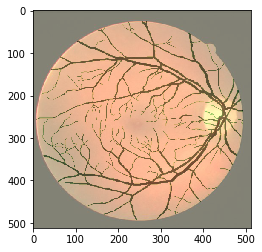

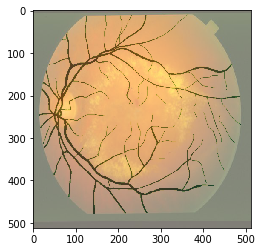

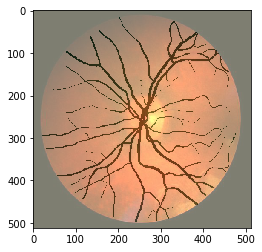

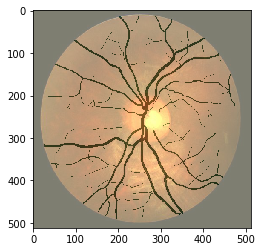

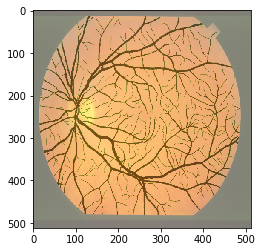

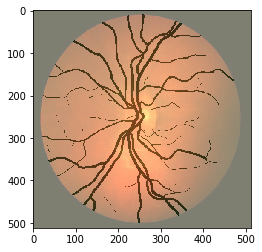

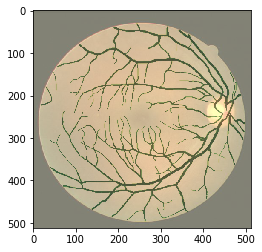

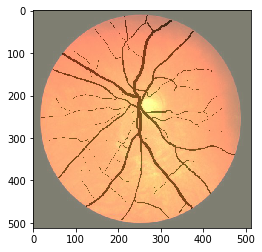

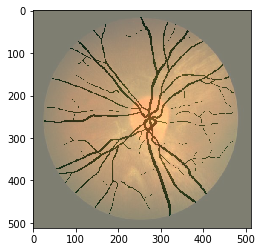

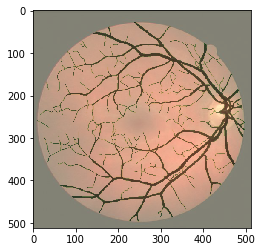

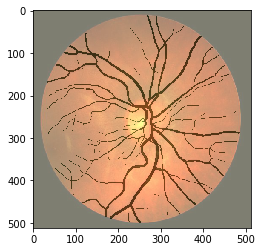

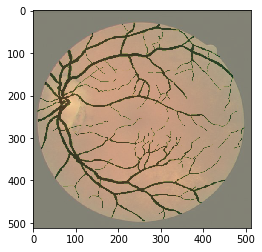

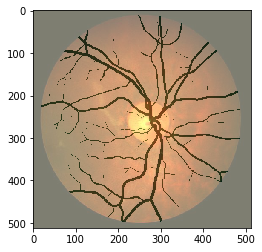

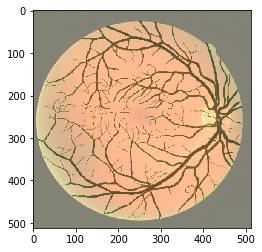

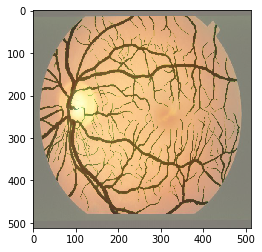

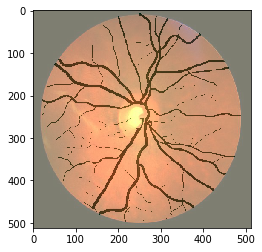

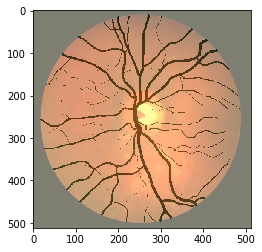

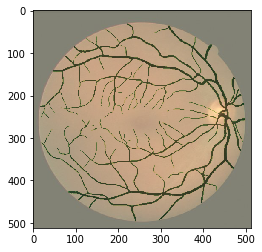

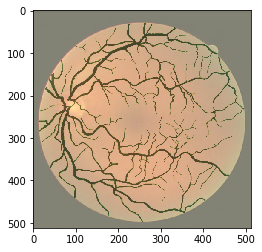

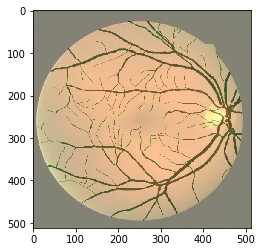

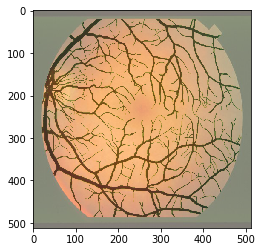

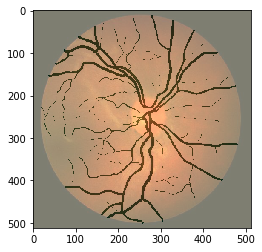

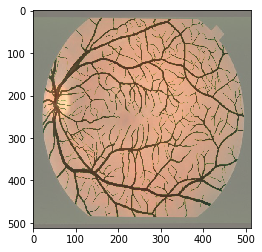

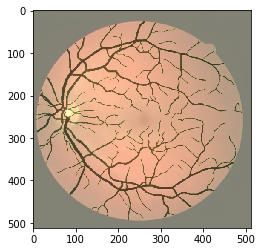

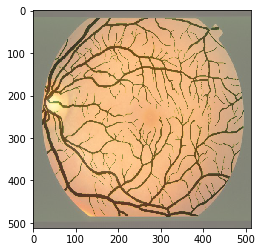

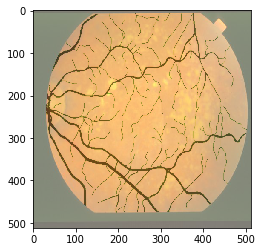

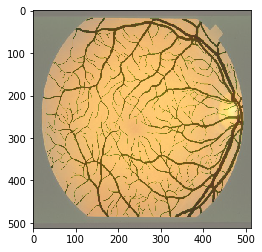

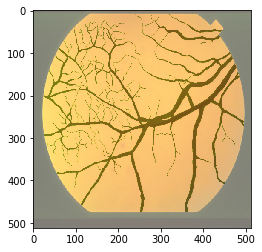

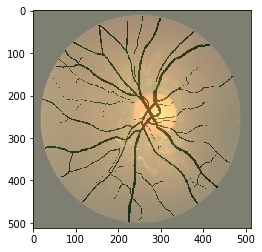

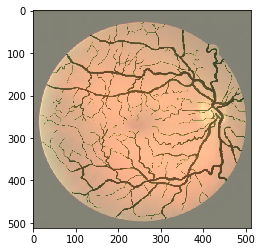

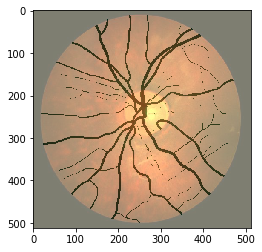

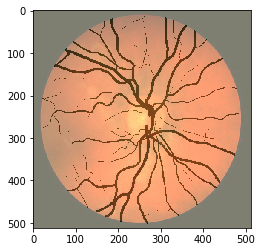

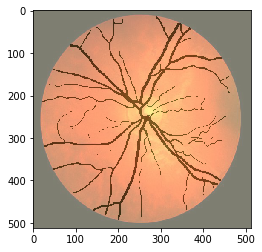

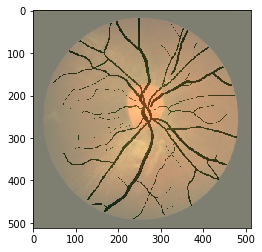

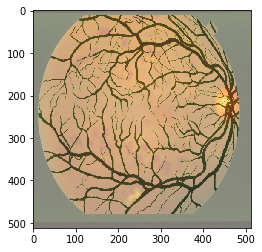

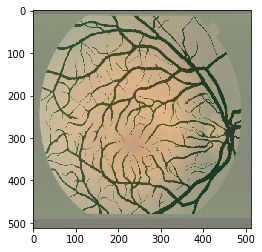

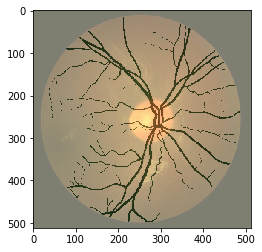

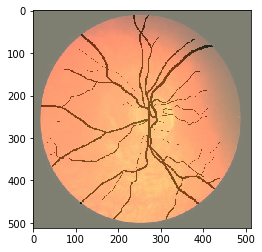

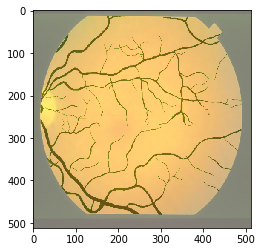

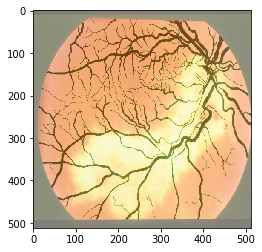

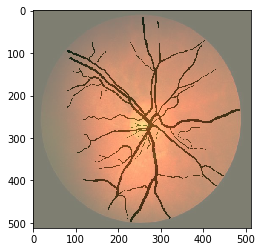

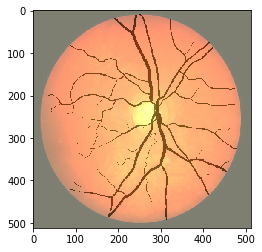

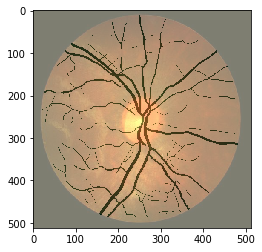

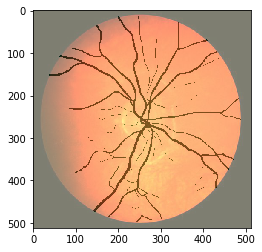

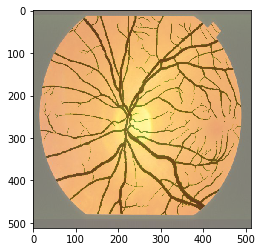

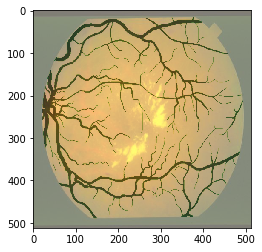

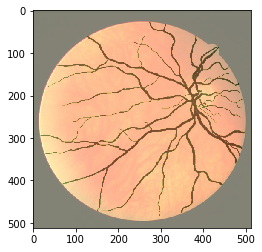

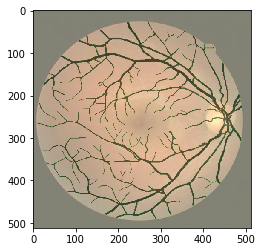

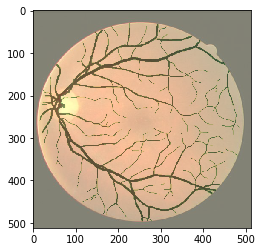

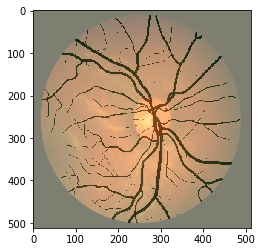

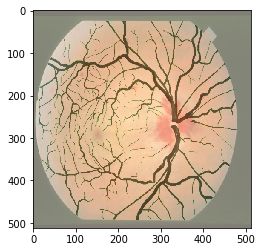

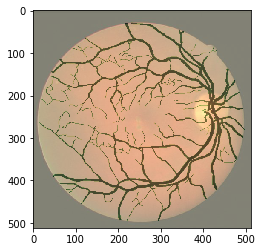

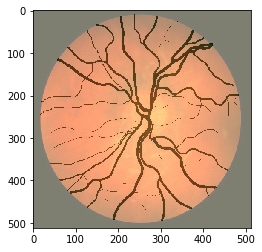

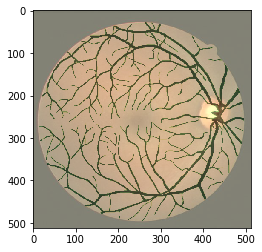

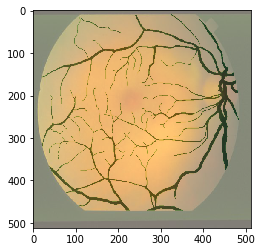

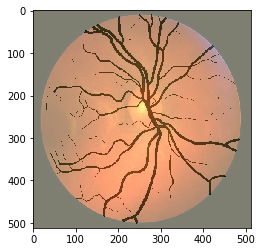

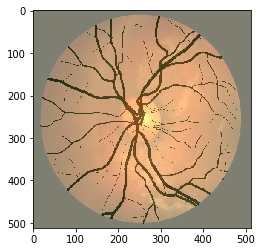

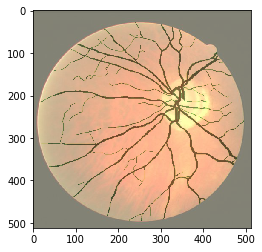

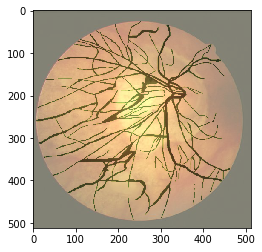

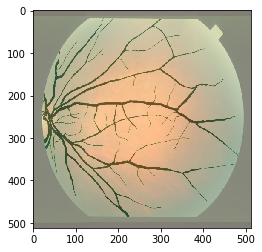

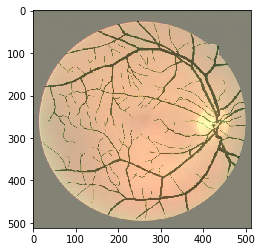

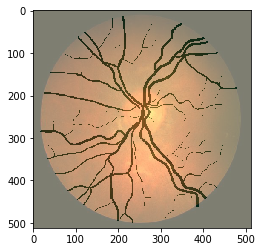

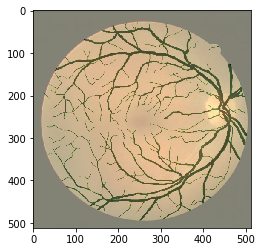

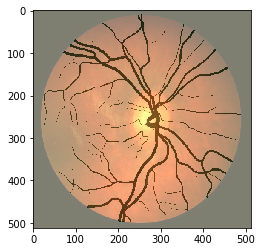

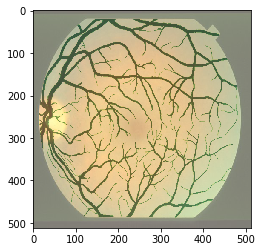

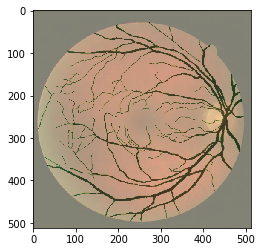

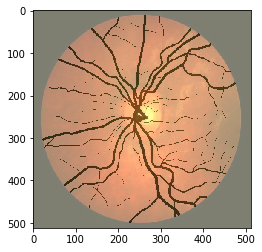

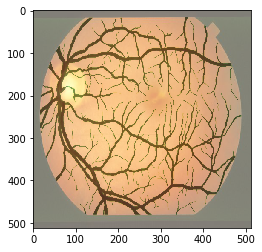

In [15]:
for image in os.listdir(cfp_outdir):
    image_path = os.path.join(cfp_outdir, image)
    seg_path = os.path.join(seg_outdir, image.split('.')[0]+'.png')
    im = Image.open(image_path)
    seg = Image.open(seg_path)
    plt.imshow(im)
    plt.imshow(seg, cmap='YlGn', alpha=0.5)
    plt.show()